In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import joblib

#### EXPLORE DATA

In [3]:
df=pd.read_csv('GlobalWeatherRepository.csv')
df.head(5)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
df.shape

(48526, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48526 entries, 0 to 48525
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       48526 non-null  object 
 1   location_name                 48526 non-null  object 
 2   latitude                      48526 non-null  float64
 3   longitude                     48526 non-null  float64
 4   timezone                      48526 non-null  object 
 5   last_updated_epoch            48526 non-null  int64  
 6   last_updated                  48526 non-null  object 
 7   temperature_celsius           48526 non-null  float64
 8   temperature_fahrenheit        48526 non-null  float64
 9   condition_text                48526 non-null  object 
 10  wind_mph                      48526 non-null  float64
 11  wind_kph                      48526 non-null  float64
 12  wind_degree                   48526 non-null  int64  
 13  w

In [6]:
df.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [7]:
df.duplicated().sum()

0

In [8]:
temp=df["temperature_celsius"].describe()
temp

count    48526.000000
mean        23.068736
std          9.142486
min        -24.800000
25%         18.300000
50%         25.300000
75%         29.000000
max         49.200000
Name: temperature_celsius, dtype: float64

#### converting all countries names to english

In [9]:
df['country'] = df['country'].apply(lambda x: 'Colombia' if x == 'كولومبيا' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == '火鸡' else x)
df['country'] = df['country'].apply(lambda x: 'Poland' if x == 'Польша' else x)
df['country'] = df['country'].apply(lambda x: 'Turkey' if x == 'Турция' else x)
df['country'] = df['country'].apply(lambda x: 'Guatemala' if x == 'Гватемала' else x)

# Show the last 50 unique values
unique_countries=df['country'].nunique()
num_unique_countries=df['country'].unique()[-50:]
unique_countries, num_unique_countries

(205,
 array(['South Africa', 'South Korea', 'Sudan', 'Spain', 'Sri Lanka',
        'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Tajikistan',
        'Tanzania', 'Timor-Leste', 'Tonga', 'Trinidad and Tobago',
        'Tunisia', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine',
        'United Arab Emirates', 'United Kingdom',
        'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
        'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe', 'Colombia',
        'USA United States of America', "Lao People's Democratic Republic",
        'Libya', 'Kosovo', 'Togo', 'Malásia', 'Komoren', 'Estonie', 'Inde',
        'Letonia', 'Mexique', 'Polônia', 'Marrocos',
        'Saint-Vincent-et-les-Grenadines', 'Saudi Arabien', 'Südkorea',
        'Bélgica', 'Turkménistan', 'Jemen'], dtype=object))

#### Remove any irrelevant data that won't affect the temperature

In [10]:
columns_to_delete = [ 'latitude', 'longitude', 'last_updated_epoch',
                      'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'pressure_mb', 'pressure_in',
                      'wind_direction', 'precip_mm', 'precip_in', 'air_quality_PM2.5', 'air_quality_PM10',
                      'visibility_km', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'moon_illumination',
                      'moon_phase', 'moonset', 'moonrise', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph',
                      'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
                      'air_quality_Sulphur_dioxide', 'cloud']

# Use the drop method to delete the specified columns
df=df.drop(columns=columns_to_delete)
df


,country,location_name,timezone,last_updated,temperature_celsius,temperature_fahrenheit,humidity,feels_like_celsius,feels_like_fahrenheit,sunrise,sunset
0,Afghanistan,Kabul,Asia/Kabul,2024-05-16 13:15,26.6,79.8,24,25.3,77.5,04:50 AM,06:50 PM
1,Albania,Tirana,Europe/Tirane,2024-05-16 10:45,19.0,66.2,94,19.0,66.2,05:21 AM,07:54 PM
2,Algeria,Algiers,Africa/Algiers,2024-05-16 09:45,23.0,73.4,29,24.6,76.4,05:40 AM,07:50 PM
3,Andorra,Andorra La Vella,Europe/Andorra,2024-05-16 10:45,6.3,43.3,61,3.8,38.9,06:31 AM,09:11 PM
4,Angola,Luanda,Africa/Luanda,2024-05-16 09:45,26.0,78.8,89,28.7,83.6,06:12 AM,05:55 PM
...,...,...,...,...,...,...,...,...,...,...,...
48521,Venezuela,Caracas,America/Caracas,2025-01-21 06:30,23.4,74.1,69,25.7,78.3,06:51 AM,06:27 PM
48522,Vietnam,Hanoi,Asia/Bangkok,2025-01-21 17:30,23.2,73.8,47,24.0,75.3,06:36 AM,05:40 PM
48523,Yemen,Sanaa,Asia/Aden,2025-01-21 13:30,21.9,71.4,17,21.9,71.4,06:33 AM,05:56 PM
48524,Zambia,Lusaka,Africa/Lusaka,2025-01-21 12:30,21.2,70.2,80,21.2,70.2,05:52 AM,06:45 PM


#### Organizing the data in the dataframe

In [11]:
df[['Year', 'Month', 'DayTime']] = df['last_updated'].str.split('-', expand=True, n=2)

# Further split the 'DayTime' column into separate columns for day and time
df[['Day', 'Time']] = df['DayTime'].str.split(' ', expand=True, n=1)

# Convert the 'Year', 'Month', 'Day' and 'Time' columns to numeric values
df['Year'] = pd.to_numeric(df['Year'])
df['Month'] = pd.to_numeric(df['Month'])
df['Day'] = pd.to_numeric(df['Day'])

# Drop unnecessary columns
df = df.drop(['DayTime', 'Time', 'Year', 'last_updated'], axis=1)
df

,country,location_name,timezone,temperature_celsius,temperature_fahrenheit,humidity,feels_like_celsius,feels_like_fahrenheit,sunrise,sunset,Month,Day
0,Afghanistan,Kabul,Asia/Kabul,26.6,79.8,24,25.3,77.5,04:50 AM,06:50 PM,5,16
1,Albania,Tirana,Europe/Tirane,19.0,66.2,94,19.0,66.2,05:21 AM,07:54 PM,5,16
2,Algeria,Algiers,Africa/Algiers,23.0,73.4,29,24.6,76.4,05:40 AM,07:50 PM,5,16
3,Andorra,Andorra La Vella,Europe/Andorra,6.3,43.3,61,3.8,38.9,06:31 AM,09:11 PM,5,16
4,Angola,Luanda,Africa/Luanda,26.0,78.8,89,28.7,83.6,06:12 AM,05:55 PM,5,16
...,...,...,...,...,...,...,...,...,...,...,...,...
48521,Venezuela,Caracas,America/Caracas,23.4,74.1,69,25.7,78.3,06:51 AM,06:27 PM,1,21
48522,Vietnam,Hanoi,Asia/Bangkok,23.2,73.8,47,24.0,75.3,06:36 AM,05:40 PM,1,21
48523,Yemen,Sanaa,Asia/Aden,21.9,71.4,17,21.9,71.4,06:33 AM,05:56 PM,1,21
48524,Zambia,Lusaka,Africa/Lusaka,21.2,70.2,80,21.2,70.2,05:52 AM,06:45 PM,1,21


#### Label encoding for categorical columns

In [12]:
#convert all categorical columns to numerical
categorical_features = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

#### Data Analysis

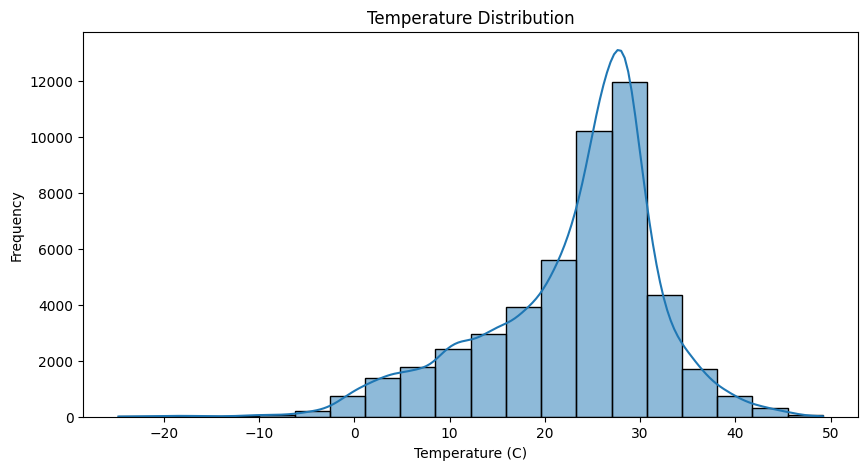

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['temperature_celsius'], bins=20,kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

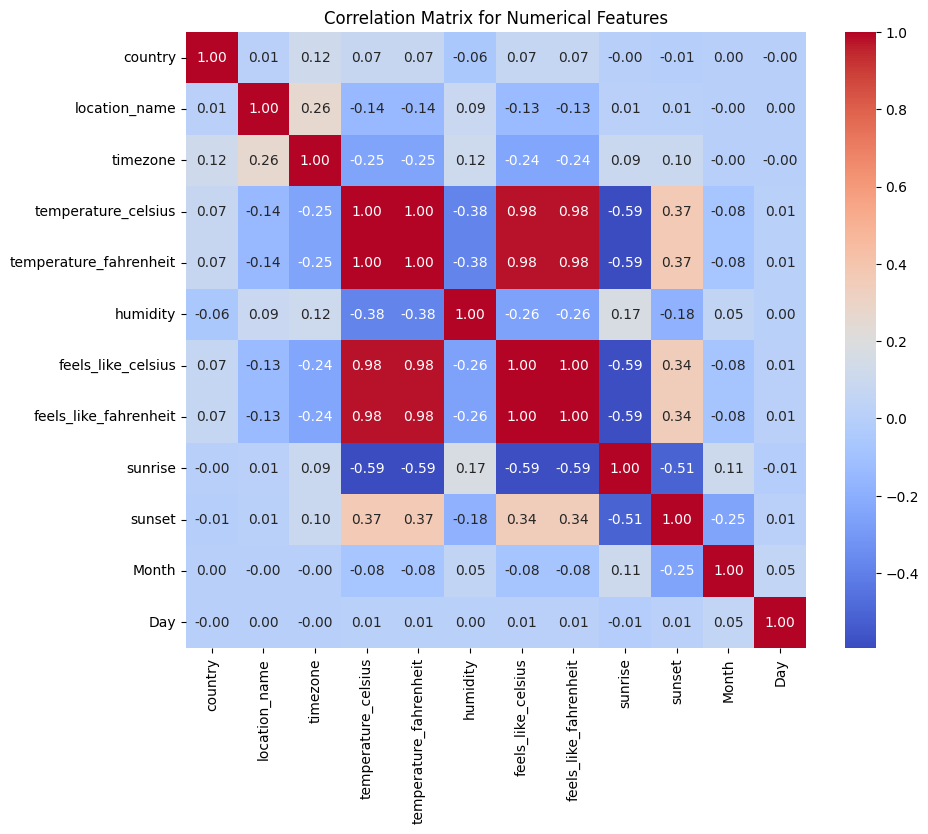

In [14]:
# Correlation matrix for numerical features only
numerical_features = df.select_dtypes(include=[np.number]).columns
if len(numerical_features) > 1:
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix for Numerical Features')
    plt.show()

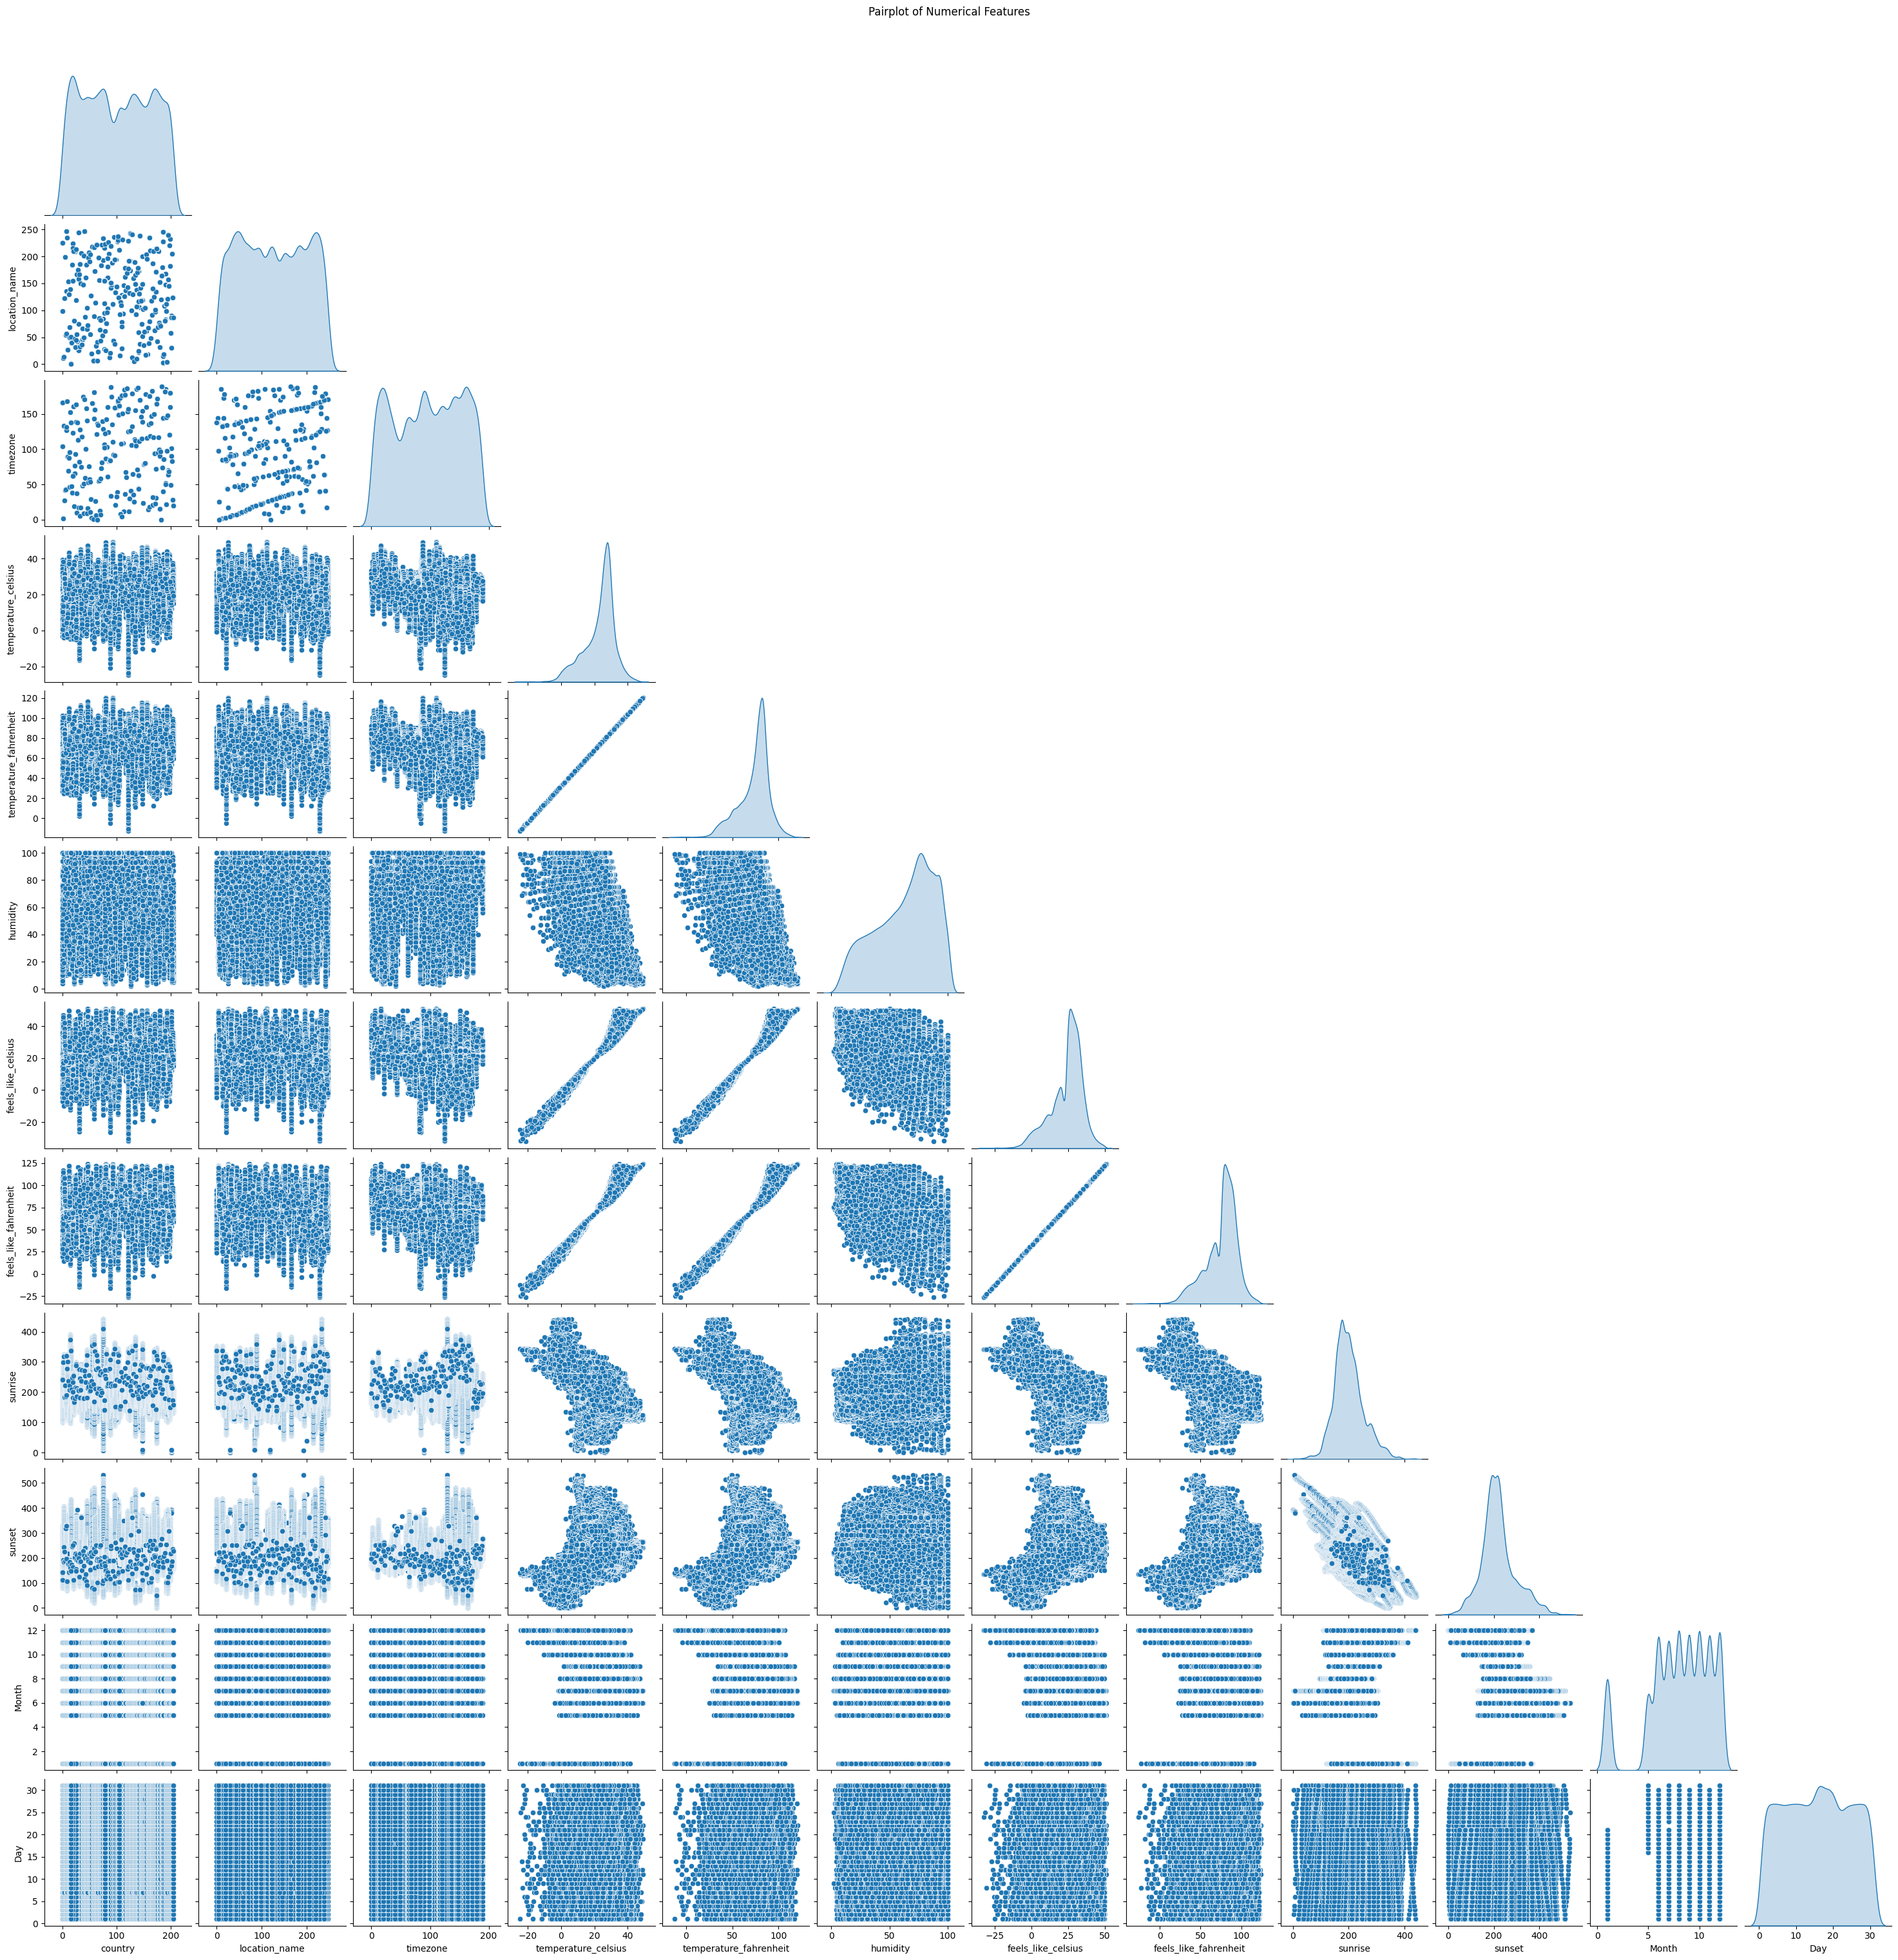

In [15]:
if len(numerical_features) > 1:
    sns.pairplot(df[numerical_features], diag_kind='kde', corner=True)
    plt.suptitle('Pairplot of Numerical Features', y=1.02)
    plt.show()

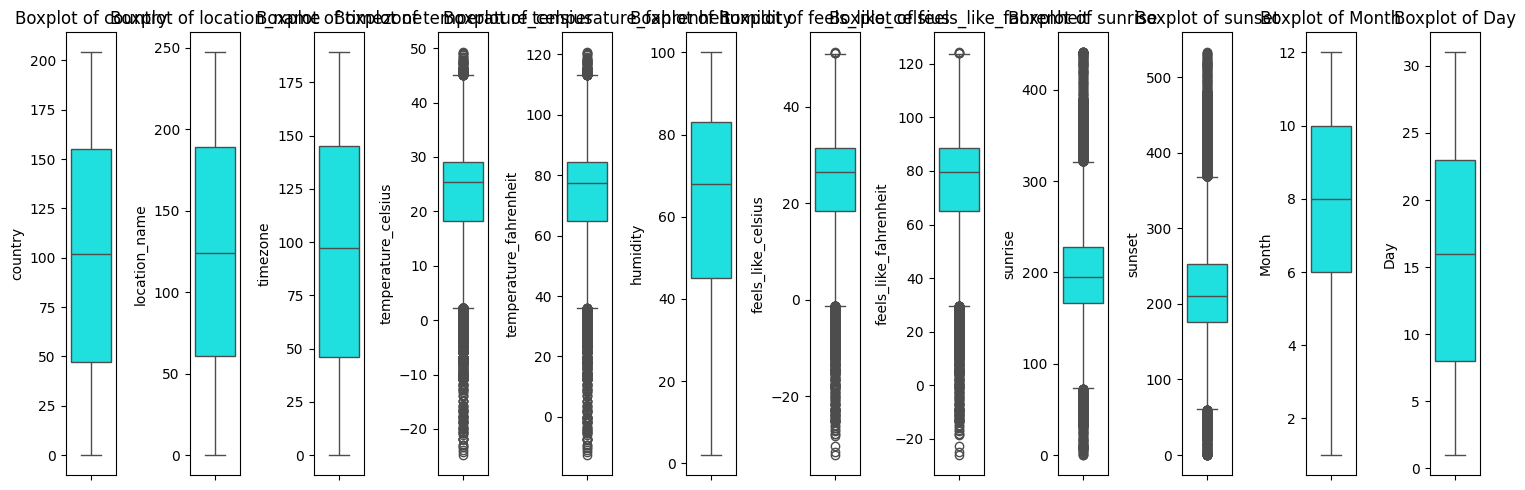

In [16]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(y=df[feature], color='cyan')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

#### Handling outliers using IQR

In [17]:
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers to the lower and upper bounds
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])

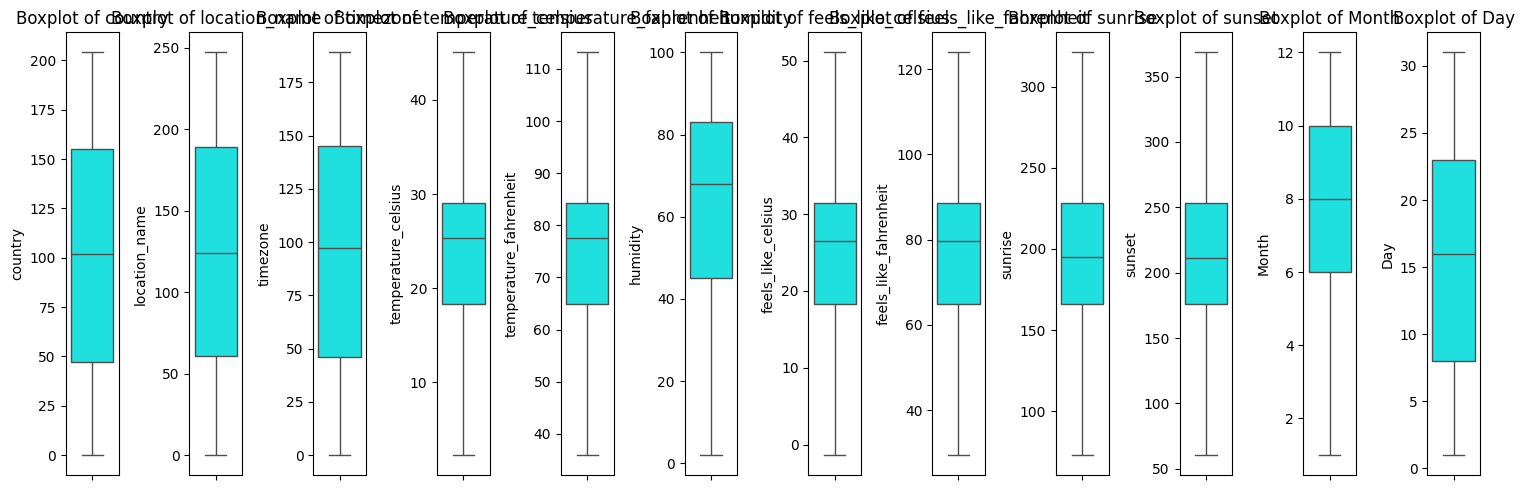

In [18]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, len(numerical_features), i + 1)
    sns.boxplot(y=df[feature], color='cyan')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

#### MODEL TRAINING

In [19]:
X = df.drop(columns=['temperature_celsius'])
y = df['temperature_celsius']

# 4. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features for better performance
    ('model', RandomForestRegressor(random_state=42))  # Random Forest Regressor
])

# 6. Define hyperparameters for GridSearchCV
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

In [21]:
# 7. Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# Train the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=2)

In [22]:
# Best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [23]:
y_pred = best_model.predict(X_test)


#### MODEL EVALUATION

In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 0.00
Mean Absolute Error (MAE): 0.01
R-squared (R2): 1.00


In [25]:
y_test_class = np.round(y_test).astype(int)  # Convert target to classes for F1 Score
y_pred_class = np.round(y_pred).astype(int)
f1 = f1_score(y_test_class, y_pred_class, average='weighted')
f1

0.9822691981476939

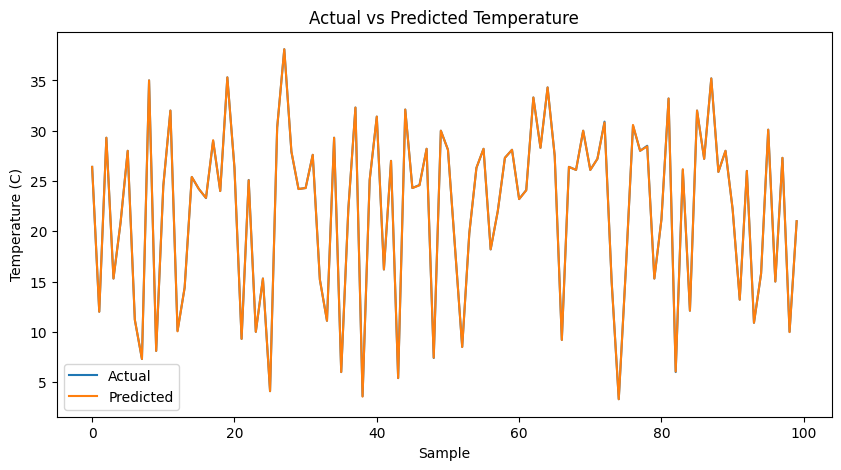

In [35]:
#lineear comparison bertween actual and predicted values for part of the data
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Sample')
plt.ylabel('Temperature (C)')
plt.legend()
plt.show()





#### Extracting .pkl to implement it in the API

In [27]:
joblib.dump(best_model, 'weather_predictive_model.pkl')

['weather_predictive_model.pkl']